#Practical: Preprocessing Real-World Datasets for NLP Objective

To preprocess real-world text data for NLP tasks by cleaning, normalizing, and transforming raw datasets (e.g., Twitter data or customer reviews) into usable formats for machine learning models.



# step 1. Import Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#step 2. Load the Dataset

Use publicly available datasets or custom datasets for tweets, reviews, etc.

In [7]:


# Sample data
data = {
    "text": [
        "I love this product! Best purchase ever. 😊 #happy",
        "Terrible service... never coming back! 😡 @Company",
        "Check out our website for amazing deals: https://example.com",
        "Product arrived late, but quality is great. Thanks! 👍",
        "Why is this app so slow? Fix it! #frustrated",
        "Amazing experience! Highly recommend this place. ⭐⭐⭐⭐⭐",
        "Horrible! Totally waste of money. 👎",
        "Superb customer service! Keep it up. @SupportTeam",
        "Great value for money. Will buy again! #satisfied",
        "Disappointed with the packaging. Could be better. 🙁",
    ],
    "label": [
        "positive", "negative", "neutral", "positive", "negative",
        "positive", "negative", "positive", "positive", "negative"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("dataset.csv", index=False)
print("Sample dataset saved as 'dataset.csv'.")





Sample dataset saved as 'dataset.csv'.


In [8]:
# Load dataset (e.g., CSV file containing tweets or reviews)
data = pd.read_csv('dataset.csv')  # Replace with your dataset file
print(data.head())

                                                text     label
0  I love this product! Best purchase ever. 😊 #happy  positive
1  Terrible service... never coming back! 😡 @Company  negative
2  Check out our website for amazing deals: https...   neutral
3  Product arrived late, but quality is great. Th...  positive
4       Why is this app so slow? Fix it! #frustrated  negative


# Step3. Understand the Dataset
Display data information to understand the structure.



In [9]:
# Display dataset information
print(data.info())
print(data['text'].head())  # Assume 'text' column contains the raw text data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None
0    I love this product! Best purchase ever. 😊 #happy
1    Terrible service... never coming back! 😡 @Company
2    Check out our website for amazing deals: https...
3    Product arrived late, but quality is great. Th...
4         Why is this app so slow? Fix it! #frustrated
Name: text, dtype: object


# step 4. Text Cleaning

Steps:

Remove HTML tags

Convert to lowercase

Remove URLs, mentions, hashtags, and special characters

Remove numbers

Remove stopwords

Tokenization and lemmatization

In [10]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply text cleaning to the dataset
data['cleaned_text'] = data['text'].apply(clean_text)
print(data[['text', 'cleaned_text']].head())


                                                text  \
0  I love this product! Best purchase ever. 😊 #happy   
1  Terrible service... never coming back! 😡 @Company   
2  Check out our website for amazing deals: https...   
3  Product arrived late, but quality is great. Th...   
4       Why is this app so slow? Fix it! #frustrated   

                                cleaned_text  
0            love product best purchase ever  
1         terrible service never coming back  
2                 check website amazing deal  
3  product arrived late quality great thanks  
4                               app slow fix  


#step 5. Exploratory Data Analysis (EDA)

Generate insights from the cleaned text data.

a) Word Frequency Analysis

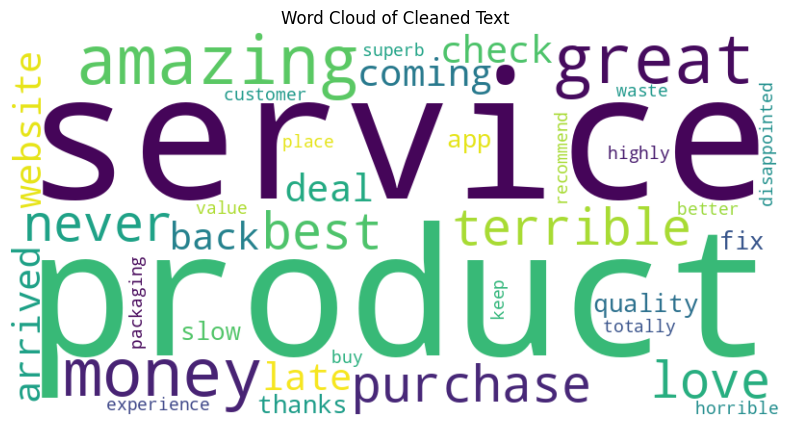

In [12]:
# Concatenate all cleaned text
all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


b) Length Distribution

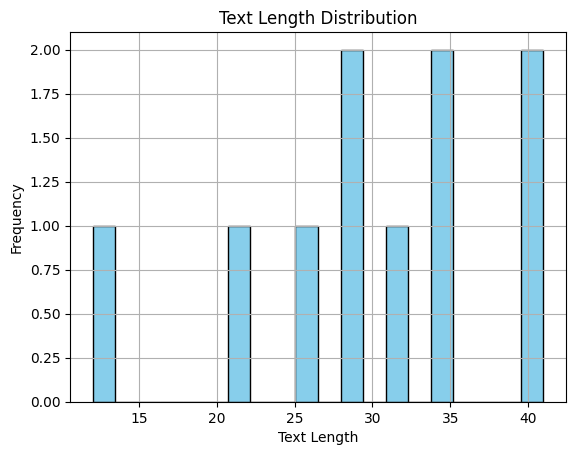

In [13]:
# Add text length as a feature
data['text_length'] = data['cleaned_text'].apply(len)
data['text_length'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


#step 6. Data Splitting
Split the dataset into training and testing sets for further analysis or modeling.

In [14]:
# Assuming the dataset has a 'label' column for classification
X = data['cleaned_text']
y = data['label']  # Replace with your target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 8
Testing data size: 2


# step 7. Export Cleaned Data
Save the cleaned dataset for future use.

In [15]:
# Save cleaned data to a CSV file
data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'")


Cleaned dataset saved to 'cleaned_dataset.csv'
